## Test modules during dev


In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
import sys
sys.path.append('./modules/')

In [4]:
%reload_ext autoreload
%autoreload 2
import datasets

In [5]:
#dtree = datasets.read_filtered_datatree()
#dtree = datasets.calculate_magnitudes(dtree)

In [84]:
DT = datasets.SimulationData(simulation_names=['P2L', 'DG'], filter_scales=['50','100','200','400'])

In [85]:
DT.preprocess_simulation_data(window_size=3)

In [86]:
DT.simulation_data

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:                      (Time: 7200, xh: 150, yh: 200, zl: 2, Xn: 3,
│   │                                         Yn: 3, zi: 3)
│   │       Coordinates:
│   │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
│   │         * xh                           (xh) float64 1kB 4.0 12.0 ... 1.196e+03
│   │         * yh                           (yh) float64 2kB 4.0 12.0 ... 1.596e+03
│   │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
│   │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables: (12/40)
│   │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dvdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dhdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dhdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           ...                           ...
│   │           dvdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dvdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dhdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           dhdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
│   │           uphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 199, 149), meta=np.ndarray>
│   │           vphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 199, 149), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   ├── DataTree('100')
│   │       Dimensions:                      (Time: 7200, xh: 60, yh: 80, zl: 2, Xn: 3,
│   │                                         Yn: 3, zi: 3)
│   │       Coordinates:
│   │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
│   │         * xh                           (xh) float64 480B 10.0 30.0 ... 1.19e+03
│   │         * yh                           (yh) float64 640B 10.0 30.0 ... 1.59e+03
│   │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
│   │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables: (12/40)
│   │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
│   │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
│   │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
│  

In [121]:
ML_DT = datasets.MLDataset(simulation_data=DT,input_variables=['dudx_widened'],output_variables=['uphp'])

In [122]:
ML_DT.create_ML_variables()

In [123]:
ML_DT.ml_dataset

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 9360)
│   │       Coordinates:
│   │         * points        (points) object 75kB MultiIndex
│   │         * Time          (points) object 75kB 0001-06-20 00:00:00 ... 0001-04-11 00:...
│   │         * xh            (points) float64 75kB 260.0 516.0 260.0 ... 708.0 132.0 964.0
│   │         * yh            (points) float64 75kB 68.0 260.0 516.0 ... 1.22e+03 1.412e+03
│   │         * zl            (points) float64 75kB 1.031e+03 1.033e+03 ... 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 674kB dask.array<chunksize=(3, 3, 9360), meta=np.ndarray>
│   │           uphp          (points) float32 37kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │           h_mask        (points) bool 9kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   ├── DataTree('100')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 9360)
│   │       Coordinates:
│   │         * points        (points) object 75kB MultiIndex
│   │         * Time          (points) object 75kB 0001-04-11 00:00:00 ... 0001-04-01 00:...
│   │         * xh            (points) float64 75kB 330.0 970.0 970.0 ... 810.0 170.0 410.0
│   │         * yh            (points) float64 75kB 330.0 1.21e+03 330.0 ... 890.0 1.37e+03
│   │         * zl            (points) float64 75kB 1.033e+03 1.031e+03 ... 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 674kB dask.array<chunksize=(3, 3, 9360), meta=np.ndarray>
│   │           uphp          (points) float32 37kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │           h_mask        (points) bool 9kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     100
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 100 km resolution
│   ├── DataTree('200')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 9360)
│   │       Coordinates:
│   │         * points        (points) object 75kB MultiIndex
│   │         * Time          (points) object 75kB 0001-04-11 00:00:00 ... 0001-06-30 00:...
│   │         * xh            (points) float64 75kB 100.0 260.0 420.0 ... 260.0 1.14e+03
│   │         * yh            (points) float64 75kB 1.3e+03 500.0 180.0 ... 100.0 180.0
│   │         * zl            (points) float64 75kB 1.033e+03 1.031e+03 ... 1.031e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 674kB dask.array<chunksize=(3, 3, 9360), meta=np.ndarray>
│   │           uphp          (points) float32 37kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │           h_mask        (points) bool 9kB dask.array<chunksize=(9360,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     200
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 200 km resolution
│   └── DataTree('400')
│           Dimensions:       (Xn: 3, Yn: 3, points: 9360)
│           Coordinates:
│             * points        (points) object 75kB MultiIndex
│             * Time          (points) object 75kB 0001-04-01 00:00:00 ... 0001-06-20 00:...
│             * xh            (points) float64 75kB 920.0 520.0 200.0 ... 520.0 520.0 440.0
│             * yh     

In [118]:
ML_DT.min_points

9360

In [73]:
temp = ds.isel(points= np.random.choice(10640, 10640, replace=False))
temp.uphp[0:50].values

array([-3.42217427e-05, -4.82251358e+00, -1.42699070e-02,  3.22521305e+00,
        1.05971920e+00,  1.76187823e-04, -4.52130509e-04,  2.96858252e-05,
       -7.44639456e-01,  7.65248090e-02,  6.71209209e-03,  6.24471286e-04,
       -5.74055812e-05,  1.66289654e-04,  4.89033293e-04,  4.21492010e-01,
       -1.01579893e-02, -3.82047519e-02, -1.40789598e-01,  9.22390958e-04,
        1.37826905e-03,  2.96584308e-01,  2.25159228e-01,  4.08684864e-04,
       -2.29540825e+00,  2.18671143e-01,  5.21736193e+00, -2.90855020e-02,
       -1.72440559e-02,  2.14663078e-06, -9.91417706e-01, -3.33570480e-01,
        2.22630729e-03,  1.31633258e+00, -1.36844302e-03, -2.97870301e-02,
       -4.64766147e-03,  3.48295458e-03,  1.86433626e-05,  1.14959475e-04,
       -4.03953105e-01, -1.14688037e-05,  3.49673745e-03,  1.76801188e-06,
        1.35672657e-04,  1.49618107e-04,  1.66278798e-04,  1.74531993e-02,
       -1.18647050e-03, -6.89926147e-01], dtype=float32)

In [45]:
ML_DT.ml_dataset['P2L']['100'].uphp.isel(points=slice(0, 30)).values

array([ 2.7351807e-05, -8.4296298e-05, -2.9217619e-05, -2.2443036e-04,
       -7.9425750e-04, -5.3459237e-04, -5.5100746e-03, -1.1564507e-03,
       -2.7554452e-02, -2.2936887e-03, -1.1597957e-01, -4.7403681e-03,
       -4.0077868e-01, -8.0579771e-03, -9.3405074e-01, -1.0363939e-02,
       -9.7181809e-01, -8.0569396e-03,  2.9658431e-01, -5.8466755e-03,
        1.1802365e+00,  3.9682013e-04,  7.9288381e-01,  6.2774573e-03,
        2.8515750e-01,  6.4589488e-03,  7.4118644e-02,  3.4313416e-03,
        1.5811043e-02,  1.7729310e-03], dtype=float32)

In [42]:
ML_DT.ml_dataset['P2L']['100'].uphp.isel(points=slice(0, 30)).values

array([ 2.7351807e-05, -8.4296298e-05, -2.9217619e-05, -2.2443036e-04,
       -7.9425750e-04, -5.3459237e-04, -5.5100746e-03, -1.1564507e-03,
       -2.7554452e-02, -2.2936887e-03, -1.1597957e-01, -4.7403681e-03,
       -4.0077868e-01, -8.0579771e-03, -9.3405074e-01, -1.0363939e-02,
       -9.7181809e-01, -8.0569396e-03,  2.9658431e-01, -5.8466755e-03,
        1.1802365e+00,  3.9682013e-04,  7.9288381e-01,  6.2774573e-03,
        2.8515750e-01,  6.4589488e-03,  7.4118644e-02,  3.4313416e-03,
        1.5811043e-02,  1.7729310e-03], dtype=float32)

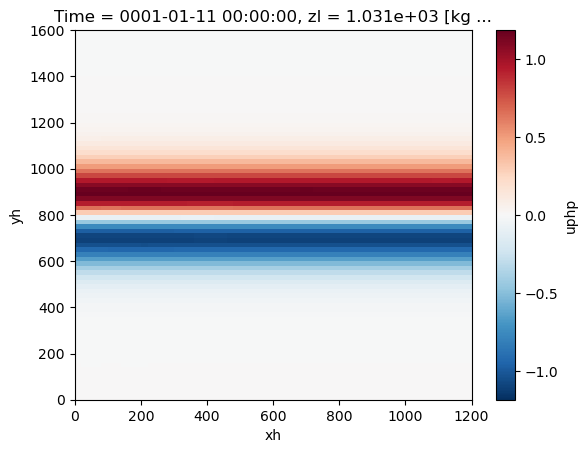

In [47]:
ML_DT.ml_dataset['P2L']['100'].uphp.isel(Time=0, zl=0).plot()

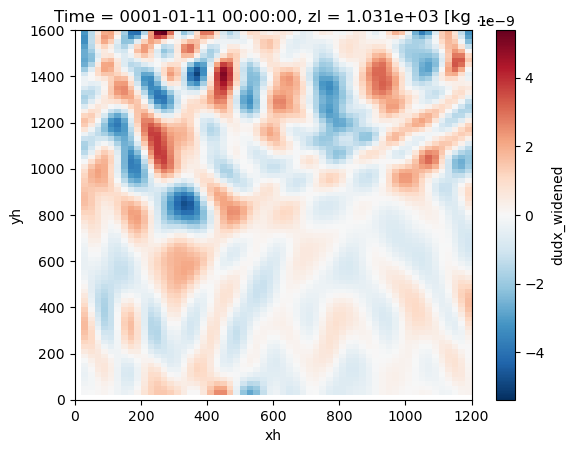

In [49]:
ML_DT.ml_dataset['P2L']['100'].dudx_widened.isel(Time=0, zl=0, Xn=0, Yn=0).plot()

In [50]:
ML_DT.ml_dataset['P2L']['100'].dudx_widened.isel(Time=0, zl=0, Xn=0, Yn=0, yh= 50).values

array([            nan,  5.25059076e-10,  1.49610051e-09,  2.03088348e-09,
        1.95539370e-09,  1.08282554e-09, -5.55045040e-10, -2.45636010e-09,
       -3.72938369e-09, -3.57966604e-09, -1.88879904e-09,  5.81927528e-10,
        2.61884752e-09,  3.34202767e-09,  2.74374037e-09,  1.57103324e-09,
        6.81566110e-10,  4.03502308e-10,  4.18590583e-10,  1.96536752e-10,
       -4.61341320e-10, -1.24345730e-09, -1.62631812e-09, -1.35691215e-09,
       -6.70184558e-10, -7.89472151e-11,  3.55547713e-11, -3.24349938e-10,
       -8.45276313e-10, -1.18563595e-09, -1.19202215e-09, -9.13136895e-10,
       -4.88191052e-10, -5.10574842e-11,  2.88871829e-10,  4.28395060e-10,
        3.13193030e-10,  1.63669277e-11, -2.64159290e-10, -3.39473995e-10,
       -1.89345149e-10,  3.63697125e-12,  1.85996997e-11, -1.86286921e-10,
       -4.20306210e-10, -4.25703930e-10, -1.07487300e-10,  3.82421615e-10,
        8.06452910e-10,  1.08299485e-09,  1.34633385e-09,  1.75146336e-09,
        2.21610045e-09,  

In [25]:
ML_DT.ml_dataset

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 1465200)
│   │       Coordinates:
│   │         * points        (points) object 12MB MultiIndex
│   │         * Time          (points) object 12MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
│   │         * xh            (points) float64 12MB 20.0 20.0 20.0 ... 1.188e+03 1.188e+03
│   │         * yh            (points) float64 12MB 20.0 20.0 36.0 ... 1.588e+03 1.588e+03
│   │         * zl            (points) float64 12MB 1.031e+03 1.033e+03 ... 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 105MB dask.array<chunksize=(3, 3, 527472), meta=np.ndarray>
│   │           uphp          (points) float32 6MB dask.array<chunksize=(527472,), meta=np.ndarray>
│   │           h_mask        (points) bool 1MB dask.array<chunksize=(527472,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:       (Xn: 3, Yn: 3, points: 904800)
│           Coordinates:
│             * points        (points) object 7MB MultiIndex
│             * Time          (points) object 7MB 0001-01-11 00:00:00 ... 0003-09-28 00:0...
│             * xh            (points) float64 7MB 30.0 30.0 30.0 ... 1.17e+03 1.17e+03
│             * yh            (points) float64 7MB 30.0 30.0 50.0 ... 1.57e+03 1.57e+03
│             * zl            (points) float64 7MB 1.031e+03 1.033e+03 ... 1.033e+03
│           Dimensions without coordinates: Xn, Yn
│           Data variables:
│               dudx_widened  (Xn, Yn, points) float64 65MB dask.array<chunksize=(3, 3, 81432), meta=np.ndarray>
│               uphp          (points) float32 4MB dask.array<chunksize=(325728,), meta=np.ndarray>
│               h_mask        (points) bool 905kB dask.array<chunksize=(325728,), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:       (Xn: 3, Yn: 3, points: 1741171)
    │       Coordinates:
    │         * points        (points) object 14MB MultiIndex
    │         * Time          (points) object 14MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
    │         * xh            (points) float64 14MB 0.275 0.275 0.275 ... 21.84 21.84 21.84
    │         * yh            (points) float64 14MB 30.23 30.41 30.59 ... 49.5 49.68 49.86
    │         * zl            (points) float64 14MB 1.035e+03 1.035e+03 ... 1.035e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables:
    │           dudx_widened  (Xn, Yn, points) float64 125MB dask.array<chunksize=(3, 3, 626675), meta=np.ndarray>
    │           uphp          (points) float32 7MB dask.array<chunksize=(626675,), meta=np.ndarray>
    │           h_mask        (points) bool 2MB dask.array<chunksize=(626675,), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  DG
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5...
    │           description:      Dataset for DG experiment at 50 km resolution
    └── DataTree('100')
            Dimensions:       (Xn: 3, Yn: 3, points: 1721684)
            Coordinates:
              * points        (points) object 14MB MultiIndex
              * Time          (points) object 14MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
              * xh            (points) float64 14MB 0.33 0.33 0.33 ... 21.67 21.6

In [27]:
len(ML_DT.ml_dataset['P2L']['50'].points)

1465200

In [13]:
ds_train = ML_DT.ml_dataset.isel(Time=slice(0, 100))

In [14]:
ds_train

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:       (Time: 100, zl: 2, yh: 100, xh: 75, Xn: 3, Yn: 3)
│   │       Coordinates:
│   │         * Time          (Time) object 800B 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
│   │         * xh            (xh) float64 600B 4.0 20.0 36.0 ... 1.172e+03 1.188e+03
│   │         * yh            (yh) float64 800B 4.0 20.0 36.0 ... 1.572e+03 1.588e+03
│   │         * zl            (zl) float64 16B 1.031e+03 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Time, zl, yh, xh, Xn, Yn) float64 108MB dask.array<chunksize=(36, 2, 100, 75, 3, 3), meta=np.ndarray>
│   │           uphp          (Time, zl, yh, xh) float32 6MB dask.array<chunksize=(36, 2, 100, 75), meta=np.ndarray>
│   │           h_mask        (Time, zl, yh, xh) bool 2MB dask.array<chunksize=(36, 2, 100, 75), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:       (Time: 100, zl: 2, yh: 80, xh: 60, Xn: 3, Yn: 3)
│           Coordinates:
│             * Time          (Time) object 800B 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
│             * xh            (xh) float64 480B 10.0 30.0 50.0 ... 1.17e+03 1.19e+03
│             * yh            (yh) float64 640B 10.0 30.0 50.0 ... 1.57e+03 1.59e+03
│             * zl            (zl) float64 16B 1.031e+03 1.033e+03
│           Dimensions without coordinates: Xn, Yn
│           Data variables:
│               dudx_widened  (Time, zl, yh, xh, Xn, Yn) float64 69MB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
│               uphp          (Time, zl, yh, xh) float32 4MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
│               h_mask        (Time, zl, yh, xh) bool 960kB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:       (Time: 100, zl: 2, yh: 110, xh: 100, Xn: 3, Yn: 3)
    │       Coordinates:
    │         * Time          (Time) object 800B 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
    │         * xh            (xh) float64 800B 0.055 0.275 0.495 ... 21.39 21.62 21.84
    │         * yh            (yh) float64 880B 30.05 30.23 30.41 30.59 ... 49.5 49.68 49.86
    │         * zl            (zl) float64 16B 1.035e+03 1.036e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables:
    │           dudx_widened  (Time, zl, yh, xh, Xn, Yn) float64 158MB dask.array<chunksize=(36, 2, 110, 100, 3, 3), meta=np.ndarray>
    │           uphp          (Time, zl, yh, xh) float32 9MB dask.array<chunksize=(36, 2, 110, 100), meta=np.ndarray>
    │           h_mask        (Time, zl, yh, xh) bool 2MB dask.array<chunksize=(36, 2, 110, 100), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  DG
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5...
    │           description:      Dataset for DG experiment at 50 km resolution
    └── DataTree('100')
            Dimensions:       (Time: 100, zl: 2, yh: 110, xh: 100, Xn: 3, Yn: 3)
            Coordinates:
              * Time          (Time) object 800B 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
              * xh            (xh) float64 800B 0.11 0.33 0.55 0.77 ... 21.45 21.67 21.89
              * yh            (yh) float64 880B 30.09 30.27 30.45 ... 49.55 49.73

In [15]:
temp = ds_train.stack(points=('Time','xh','yh','zl'))
temp

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 1500000)
│   │       Coordinates:
│   │         * points        (points) object 12MB MultiIndex
│   │         * Time          (points) object 12MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
│   │         * xh            (points) float64 12MB 4.0 4.0 4.0 ... 1.188e+03 1.188e+03
│   │         * yh            (points) float64 12MB 4.0 4.0 20.0 ... 1.588e+03 1.588e+03
│   │         * zl            (points) float64 12MB 1.031e+03 1.033e+03 ... 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 108MB dask.array<chunksize=(3, 3, 540000), meta=np.ndarray>
│   │           uphp          (points) float32 6MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           h_mask        (points) bool 2MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:       (Xn: 3, Yn: 3, points: 960000)
│           Coordinates:
│             * points        (points) object 8MB MultiIndex
│             * Time          (points) object 8MB 0001-01-11 00:00:00 ... 0003-09-28 00:0...
│             * xh            (points) float64 8MB 10.0 10.0 10.0 ... 1.19e+03 1.19e+03
│             * yh            (points) float64 8MB 10.0 10.0 30.0 ... 1.59e+03 1.59e+03
│             * zl            (points) float64 8MB 1.031e+03 1.033e+03 ... 1.033e+03
│           Dimensions without coordinates: Xn, Yn
│           Data variables:
│               dudx_widened  (Xn, Yn, points) float64 69MB dask.array<chunksize=(3, 3, 86400), meta=np.ndarray>
│               uphp          (points) float32 4MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               h_mask        (points) bool 960kB dask.array<chunksize=(345600,), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:       (Xn: 3, Yn: 3, points: 2200000)
    │       Coordinates:
    │         * points        (points) object 18MB MultiIndex
    │         * Time          (points) object 18MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
    │         * xh            (points) float64 18MB 0.055 0.055 0.055 ... 21.84 21.84 21.84
    │         * yh            (points) float64 18MB 30.05 30.05 30.23 ... 49.68 49.86 49.86
    │         * zl            (points) float64 18MB 1.035e+03 1.036e+03 ... 1.036e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables:
    │           dudx_widened  (Xn, Yn, points) float64 158MB dask.array<chunksize=(3, 3, 792000), meta=np.ndarray>
    │           uphp          (points) float32 9MB dask.array<chunksize=(792000,), meta=np.ndarray>
    │           h_mask        (points) bool 2MB dask.array<chunksize=(792000,), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  DG
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5...
    │           description:      Dataset for DG experiment at 50 km resolution
    └── DataTree('100')
            Dimensions:       (Xn: 3, Yn: 3, points: 2200000)
            Coordinates:
              * points        (points) object 18MB MultiIndex
              * Time          (points) object 18MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
              * xh            (points) float64 18MB 0.11 0.11 0.11 ... 21.89 21.89 21

In [16]:
temp.dropna('points')

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:       (Xn: 3, Yn: 3, points: 1465200)
│   │       Coordinates:
│   │         * points        (points) object 12MB MultiIndex
│   │         * Time          (points) object 12MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
│   │         * xh            (points) float64 12MB 20.0 20.0 20.0 ... 1.188e+03 1.188e+03
│   │         * yh            (points) float64 12MB 20.0 20.0 36.0 ... 1.588e+03 1.588e+03
│   │         * zl            (points) float64 12MB 1.031e+03 1.033e+03 ... 1.033e+03
│   │       Dimensions without coordinates: Xn, Yn
│   │       Data variables:
│   │           dudx_widened  (Xn, Yn, points) float64 105MB dask.array<chunksize=(3, 3, 527472), meta=np.ndarray>
│   │           uphp          (points) float32 6MB dask.array<chunksize=(527472,), meta=np.ndarray>
│   │           h_mask        (points) bool 1MB dask.array<chunksize=(527472,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:       (Xn: 3, Yn: 3, points: 904800)
│           Coordinates:
│             * points        (points) object 7MB MultiIndex
│             * Time          (points) object 7MB 0001-01-11 00:00:00 ... 0003-09-28 00:0...
│             * xh            (points) float64 7MB 30.0 30.0 30.0 ... 1.17e+03 1.17e+03
│             * yh            (points) float64 7MB 30.0 30.0 50.0 ... 1.57e+03 1.57e+03
│             * zl            (points) float64 7MB 1.031e+03 1.033e+03 ... 1.033e+03
│           Dimensions without coordinates: Xn, Yn
│           Data variables:
│               dudx_widened  (Xn, Yn, points) float64 65MB dask.array<chunksize=(3, 3, 81432), meta=np.ndarray>
│               uphp          (points) float32 4MB dask.array<chunksize=(325728,), meta=np.ndarray>
│               h_mask        (points) bool 905kB dask.array<chunksize=(325728,), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:       (Xn: 3, Yn: 3, points: 1741171)
    │       Coordinates:
    │         * points        (points) object 14MB MultiIndex
    │         * Time          (points) object 14MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
    │         * xh            (points) float64 14MB 0.275 0.275 0.275 ... 21.84 21.84 21.84
    │         * yh            (points) float64 14MB 30.23 30.41 30.59 ... 49.5 49.68 49.86
    │         * zl            (points) float64 14MB 1.035e+03 1.035e+03 ... 1.035e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables:
    │           dudx_widened  (Xn, Yn, points) float64 125MB dask.array<chunksize=(3, 3, 626675), meta=np.ndarray>
    │           uphp          (points) float32 7MB dask.array<chunksize=(626675,), meta=np.ndarray>
    │           h_mask        (points) bool 2MB dask.array<chunksize=(626675,), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  DG
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5...
    │           description:      Dataset for DG experiment at 50 km resolution
    └── DataTree('100')
            Dimensions:       (Xn: 3, Yn: 3, points: 1721684)
            Coordinates:
              * points        (points) object 14MB MultiIndex
              * Time          (points) object 14MB 0001-01-11 00:00:00 ... 0003-09-28 00:...
              * xh            (points) float64 14MB 0.33 0.33 0.33 ... 21.67 21.6

In [20]:
temp.stack(points=('Time','xh','yh','zl'))

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:  (points: 1500000)
│   │       Coordinates:
│   │         * points   (points) object 12MB MultiIndex
│   │         * Time     (points) object 12MB 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
│   │         * xh       (points) float64 12MB 4.0 4.0 4.0 ... 1.188e+03 1.188e+03 1.188e+03
│   │         * yh       (points) float64 12MB 4.0 4.0 20.0 ... 1.588e+03 1.588e+03
│   │         * zl       (points) float64 12MB 1.031e+03 1.033e+03 ... 1.031e+03 1.033e+03
│   │       Data variables:
│   │           dudx     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           dvdx     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           dudy     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           dvdy     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           dhdx     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           dhdy     (points) float64 12MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           uphp     (points) float32 6MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           vphp     (points) float32 6MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │           h_mask   (points) bool 2MB dask.array<chunksize=(540000,), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:  (points: 960000)
│           Coordinates:
│             * points   (points) object 8MB MultiIndex
│             * Time     (points) object 8MB 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
│             * xh       (points) float64 8MB 10.0 10.0 10.0 ... 1.19e+03 1.19e+03 1.19e+03
│             * yh       (points) float64 8MB 10.0 10.0 30.0 ... 1.57e+03 1.59e+03 1.59e+03
│             * zl       (points) float64 8MB 1.031e+03 1.033e+03 ... 1.031e+03 1.033e+03
│           Data variables:
│               dudx     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               dvdx     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               dudy     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               dvdy     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               dhdx     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               dhdy     (points) float64 8MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               uphp     (points) float32 4MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               vphp     (points) float32 4MB dask.array<chunksize=(345600,), meta=np.ndarray>
│               h_mask   (points) bool 960kB dask.array<chunksize=(345600,), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:  (points: 2200000)
    │       Coordinates:
    │         * points   (points) object 18MB MultiIndex
    │         * Time     (points) object 18MB 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
    │         * xh       (points) float64 18MB 0.055 0.055 0.055 0.055 ... 21.84 21.84 21.84
    │         * yh       (points) float64 18MB 30.05 30.05 30.23 30.23 ... 49.68 49.86 49.86
    │         * zl       (points) float64 18MB 1.035e+03 1.036e+03 ... 1.035e+03 1.036e+03
    │       Data variables:
    │           dudx     (points) float64 18MB dask.arra

In [25]:
for node in temp.subtree:
    if node.data is not None:
        print(node.data)


AttributeError: 'DataTree' object has no attribute 'data'

In [19]:
DT.preprocess_simulation_data_pipeline(window_size=3)

AttributeError: 'SimulationData' object has no attribute 'preprocess_simulation_data_pipeline'

In [ ]:
DT.simulation_data

In [10]:
DT.ml_input_dataset

DataTree('None', parent=None)
├── DataTree('P2L')
│   ├── DataTree('50')
│   │       Dimensions:  (Time: 20, zl: 2, yh: 100, xh: 75)
│   │       Coordinates:
│   │         * Time     (Time) object 160B 0197-08-10 00:00:00 ... 0198-02-16 00:00:00
│   │         * xh       (xh) float64 600B 4.0 20.0 36.0 ... 1.156e+03 1.172e+03 1.188e+03
│   │         * yh       (yh) float64 800B 4.0 20.0 36.0 ... 1.556e+03 1.572e+03 1.588e+03
│   │         * zl       (zl) float64 16B 1.031e+03 1.033e+03
│   │       Data variables:
│   │           dudx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           dvdx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           dudy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           dvdy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           dhdx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           dhdy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │           h_mask   (Time, zl, yh, xh) bool 300kB dask.array<chunksize=(20, 2, 100, 75), meta=np.ndarray>
│   │       Attributes:
│   │           simulation_name:  P2L
│   │           filter_scale:     50
│   │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│   │           description:      Dataset for P2L experiment at 50 km resolution
│   └── DataTree('100')
│           Dimensions:  (Time: 20, zl: 2, yh: 80, xh: 60)
│           Coordinates:
│             * Time     (Time) object 160B 0197-08-10 00:00:00 ... 0198-02-16 00:00:00
│             * xh       (xh) float64 480B 10.0 30.0 50.0 ... 1.15e+03 1.17e+03 1.19e+03
│             * yh       (yh) float64 640B 10.0 30.0 50.0 ... 1.55e+03 1.57e+03 1.59e+03
│             * zl       (zl) float64 16B 1.031e+03 1.033e+03
│           Data variables:
│               dudx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               dvdx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               dudy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               dvdy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               dhdx     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               dhdy     (Time, zl, yh, xh) float64 2MB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│               h_mask   (Time, zl, yh, xh) bool 192kB dask.array<chunksize=(20, 2, 80, 60), meta=np.ndarray>
│           Attributes:
│               simulation_name:  P2L
│               filter_scale:     100
│               source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
│               description:      Dataset for P2L experiment at 100 km resolution
└── DataTree('DG')
    ├── DataTree('50')
    │       Dimensions:  (Time: 20, zl: 2, yh: 110, xh: 100)
    │       Coordinates:
    │         * Time     (Time) object 160B 0099-01-17 00:00:00 ... 0099-07-26 00:00:00
    │         * xh       (xh) float64 800B 0.055 0.275 0.495 0.715 ... 21.39 21.62 21.84
    │         * yh       (yh) float64 880B 30.05 30.23 30.41 30.59 ... 49.5 49.68 49.86
    │         * zl       (zl) float64 16B 1.035e+03 1.036e+03
    │       Data variables:
    │           dudx     (Time, zl, yh, xh) float64 4MB dask.array<chunksize=(20, 2, 110, 100), meta=np.ndarray>
    │           dvdx     (Time, zl, yh, xh) float64 4MB dask.array<chunksize=(20, 2, 110, 100), meta=np.ndarray>
    │           dudy     (Time, zl, yh, xh) float64 4MB dask.array<chunksize=(20, 2, 110, 100), meta=np.ndarray>
    │           dvdy     (Time, zl, yh, xh) float64 4MB dask.array<chunksize=(20, 2, 110,

In [20]:
DT_ML = datasets.MLDataset(simulation_data=DT)

In [25]:
DT_ML.create_ML_variables()

Creating ML variables


KeyError: "No variable named 'h_mask'. Variables on the dataset include ['dudx', 'dvdx', 'dudy', 'dvdy', 'dhdx', 'dhdy', 'Time', 'xh', 'yh', 'zl']"

In [22]:
mag_nabla_u = ((ds.dudx_widened**2 + ds.dudy_widened**2 + ds.dvdx_widened**2 + ds.dvdy_widened**2).sum(['Xn','Yn']))**0.5

In [23]:
mag_nabla_h = ((ds.dhdx_widened**2 + ds.dhdy_widened**2).sum(['Xn','Yn']))**0.5

In [21]:
mag_nabla_u

<xarray.DataArray (Time: 20, zl: 2, yh: 110, xh: 100)> Size: 4MB
dask.array<sum-aggregate, shape=(20, 2, 110, 100), dtype=float64, chunksize=(20, 2, 109, 99), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) object 160B 0099-01-17 00:00:00 ... 0099-07-26 00:00:00
  * xh       (xh) float64 800B 0.11 0.33 0.55 0.77 ... 21.23 21.45 21.67 21.89
  * yh       (yh) float64 880B 30.09 30.27 30.45 30.64 ... 49.55 49.73 49.91
  * zl       (zl) float64 16B 1.035e+03 1.036e+03

In [12]:
frame_vector_vars = ['dhdx','dhdy']
frame_vector_vars[0]

'dhdx'

In [13]:
mag_frame_vector = (ds[frame_vector_vars[0]]**2 + ds[frame_vector_vars[1]]**2)**0.5

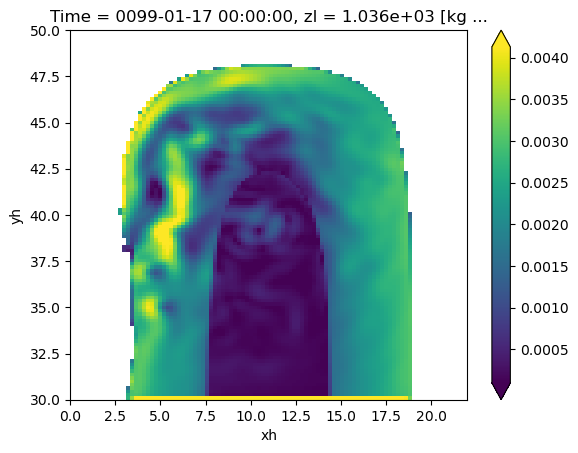

In [14]:
mag_frame_vector.isel(Time=0, zl=1).plot(robust=True)

In [15]:
T_hat_i = ds[frame_vector_vars[0]]/mag_frame_vector
T_hat_j = ds[frame_vector_vars[1]]/mag_frame_vector

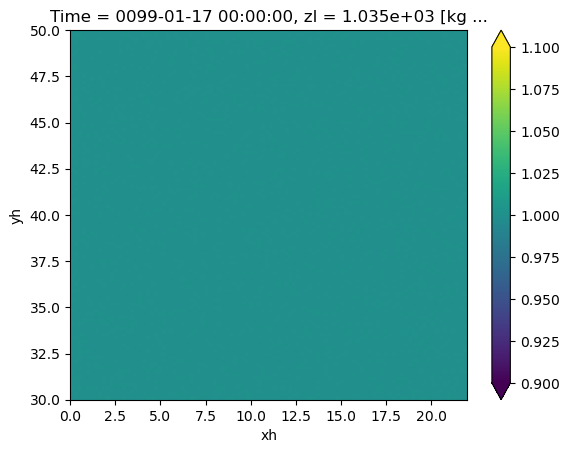

In [16]:
(T_hat_i**2 + T_hat_j**2).isel(Time=0, zl=0).plot(robust=True)

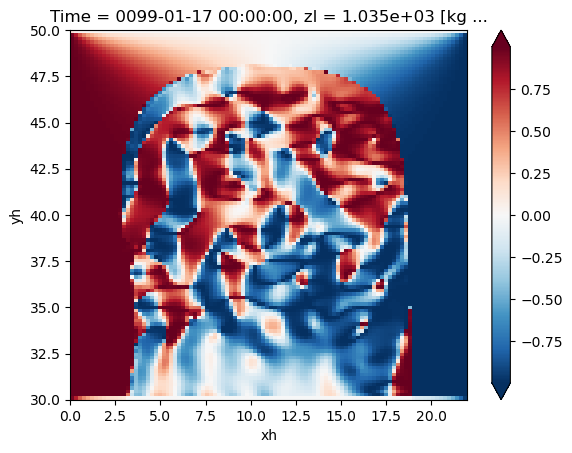

In [17]:
T_hat_i.isel(Time=0, zl=0).plot(robust=True)

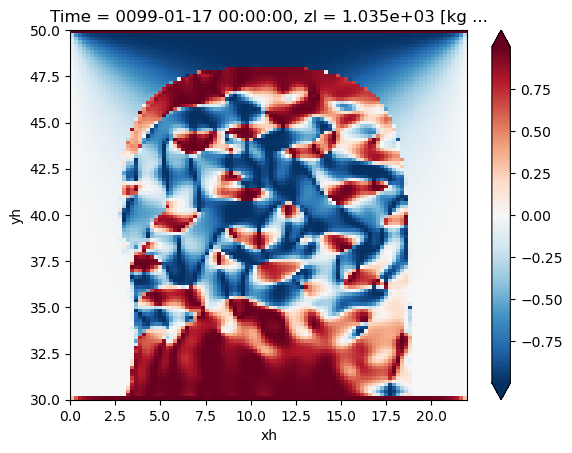

In [18]:
T_hat_j.isel(Time=0, zl=0).plot(robust=True)

In [19]:
N_hat_i = - T_hat_j
N_hat_j = T_hat_i

In [20]:
N_hat_i

<xarray.DataArray (Time: 20, zl: 2, yh: 110, xh: 100)> Size: 4MB
dask.array<neg, shape=(20, 2, 110, 100), dtype=float64, chunksize=(20, 2, 110, 100), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) object 160B 0099-01-17 00:00:00 ... 0099-07-26 00:00:00
  * xh       (xh) float64 800B 0.11 0.33 0.55 0.77 ... 21.23 21.45 21.67 21.89
  * yh       (yh) float64 880B 30.09 30.27 30.45 30.64 ... 49.55 49.73 49.91
  * zl       (zl) float64 16B 1.035e+03 1.036e+03

In [21]:
R_11 = T_hat_i
R_12 = N_hat_i
R_21 = T_hat_j
R_22 = N_hat_j

In [22]:
vec_var = frame_vector_vars

In [23]:
def rotate_vector(R_11, R_12, R_21, R_22, F_1, F_2): 
    vec_That = R_11 * F_1 + R_21 * F_2
    vec_Nhat = R_12 * F_1 + R_22 * F_2

    return vec_That, vec_Nhat


In [24]:
def two_by_two_matrix_multiplication(A_11, A_12, A_21, A_22, B_11, B_12, B_21, B_22): 
    '''
    A simple matrix multiplication of two 2X2 matrices.
    '''
    C_11 = A_11*B_11 + A_12*B_21
    C_12 = A_11*B_12 + A_12*B_22
    C_21 = A_21*B_11 + A_22*B_21
    C_22 = A_21*B_12 + A_22*B_22
    return C_11, C_12, C_21, C_22

In [25]:
def rotate_tensor(R_11, R_12, R_21, R_22, T_11, T_12, T_21, T_22): 
    '''
    Rotate tensor = R_transpose (T) R
    '''
    
    # C = R_transpose (T)
    C_11, C_12, C_21, C_22 = two_by_two_matrix_multiplication(R_11, R_21, R_12, R_22, T_11, T_12, T_21, T_22)

    # Tp = C R, where Tp is the rotated tensor
    Tp_11, Tp_12, Tp_21, Tp_22 = two_by_two_matrix_multiplication(C_11, C_12, C_21, C_22, R_11, R_12, R_21, R_22)

    return Tp_11, Tp_12, Tp_21, Tp_22

In [26]:
Tp_11, Tp_12, Tp_21, Tp_22 = rotate_tensor(R_11, R_12, R_21, R_22,
                                           ds['dudx'], ds['dudy'],
                                           ds['dvdx'], ds['dvdy'])

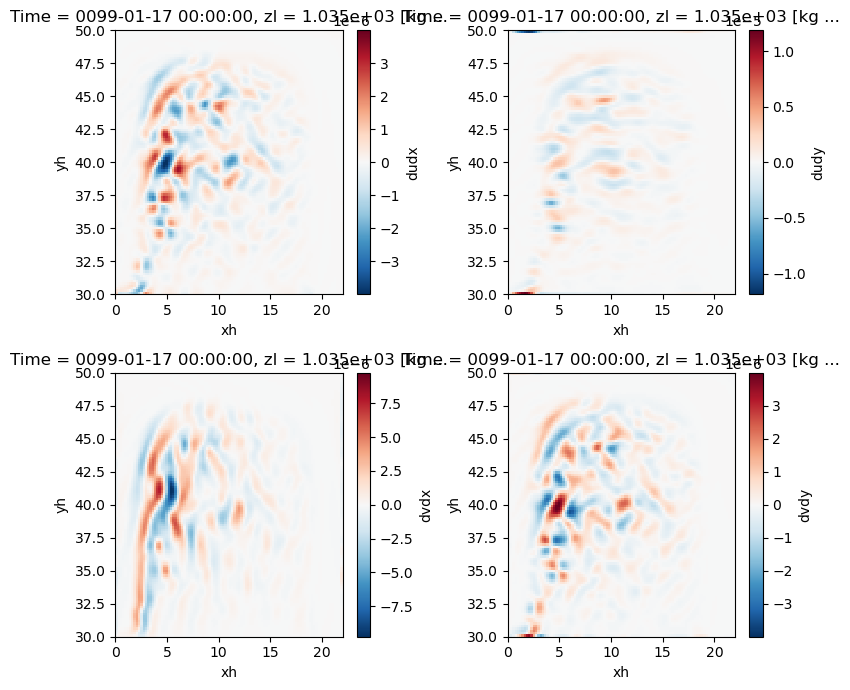

In [27]:
plt.figure(figsize=(8,7))

plt.subplot(221)
ds['dudx'].isel(Time=0, zl=0).plot()

plt.subplot(222)
ds['dudy'].isel(Time=0, zl=0).plot()

plt.subplot(223)
ds['dvdx'].isel(Time=0, zl=0).plot()

plt.subplot(224)
ds['dvdy'].isel(Time=0, zl=0).plot()

plt.tight_layout()

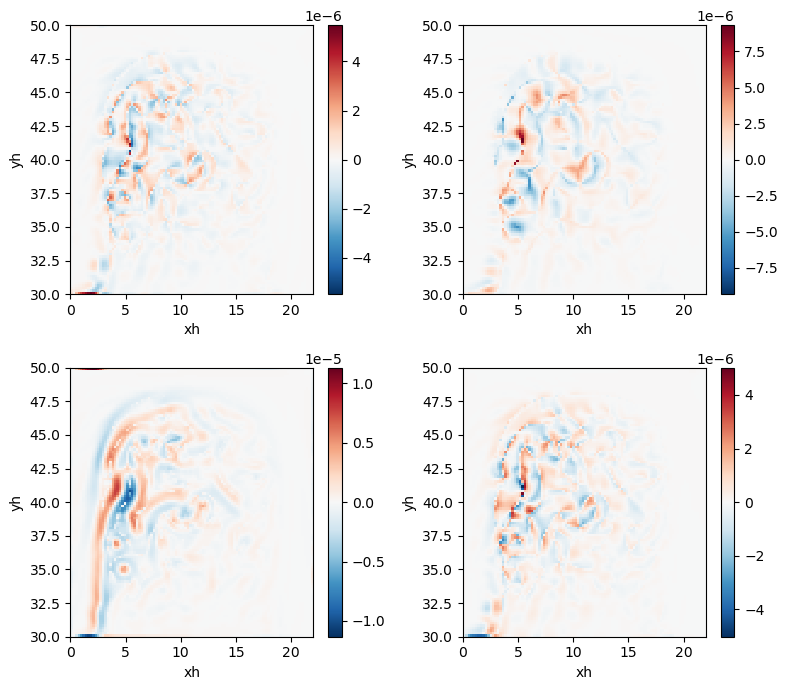

In [28]:
plt.figure(figsize=(8,7))
zl = 0
plt.subplot(221)
Tp_11.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(222)
Tp_12.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(223)
Tp_21.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(224)
Tp_22.isel(Time=0, zl=zl).plot()
plt.title('')

plt.tight_layout()

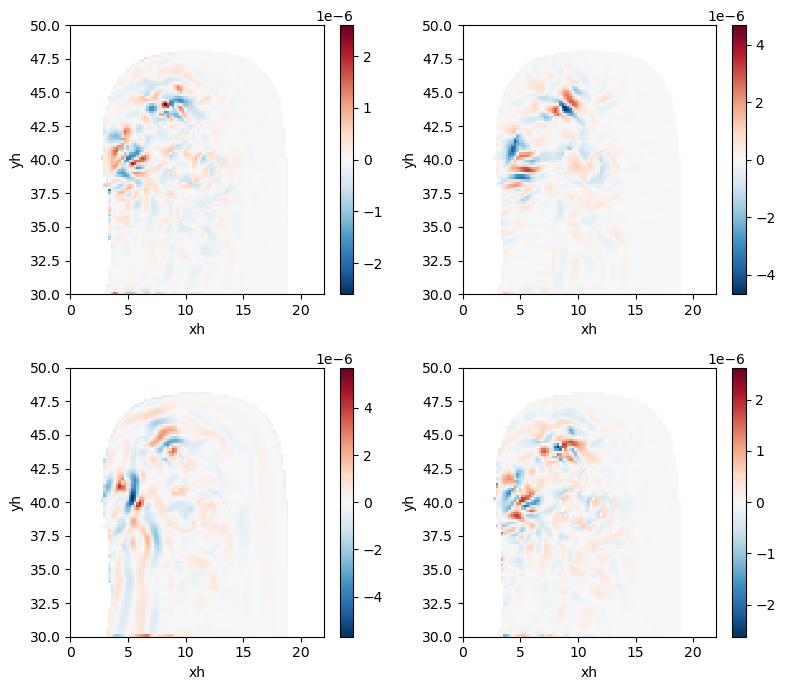

In [35]:
plt.figure(figsize=(8,7))
zl = 1
plt.subplot(221)
Tp_11.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(222)
Tp_12.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(223)
Tp_21.isel(Time=0, zl=zl).plot()
plt.title('')

plt.subplot(224)
Tp_22.isel(Time=0, zl=zl).plot()
plt.title('')

plt.tight_layout()

In [29]:
#vec_That = R_11 * ds[vec_var[0]] + R_21 * ds[vec_var[1]]
#vec_Nhat = R_12 * ds[vec_var[0]] + R_22 * ds[vec_var[1]]

vec_That, vec_Nhat = rotate_vector(R_11, R_12, R_21, R_22, ds['dhdx_widened'], ds['dhdy_widened'])

In [30]:
vec_That

<xarray.DataArray (Time: 20, zl: 2, yh: 110, xh: 100, Xn: 3, Yn: 3)> Size: 32MB
dask.array<add, shape=(20, 2, 110, 100, 3, 3), dtype=float64, chunksize=(20, 2, 109, 99, 3, 3), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) object 160B 0099-01-17 00:00:00 ... 0099-07-26 00:00:00
  * xh       (xh) float64 800B 0.11 0.33 0.55 0.77 ... 21.23 21.45 21.67 21.89
  * yh       (yh) float64 880B 30.09 30.27 30.45 30.64 ... 49.55 49.73 49.91
  * zl       (zl) float64 16B 1.035e+03 1.036e+03
Dimensions without coordinates: Xn, Yn

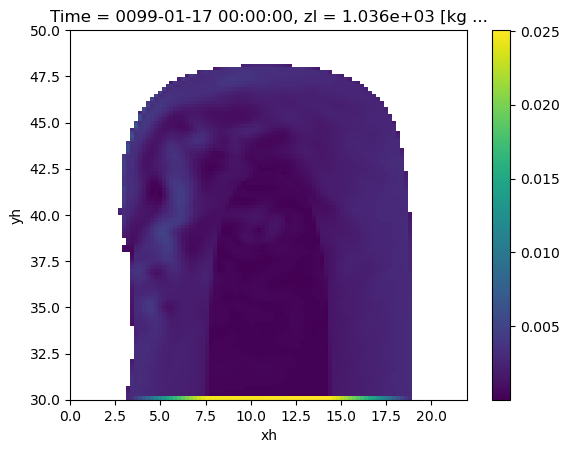

In [31]:
vec_That.isel(Time=0, zl=1, Xn=1, Yn=1).plot()

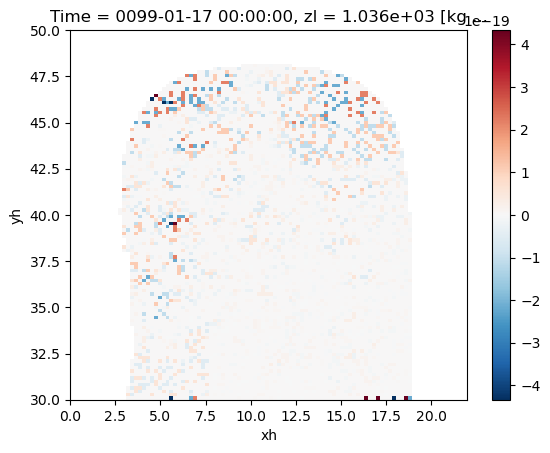

In [32]:
vec_Nhat.isel(Time=0, zl=1, Xn=1, Yn=1).plot()

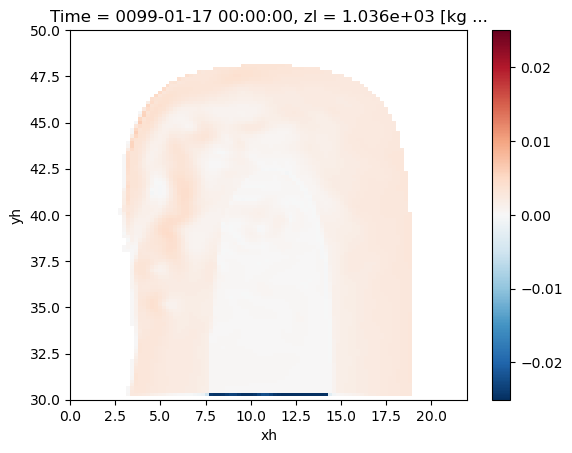

In [33]:
vec_That.isel(Time=0, zl=1, Xn=0, Yn=0).plot()

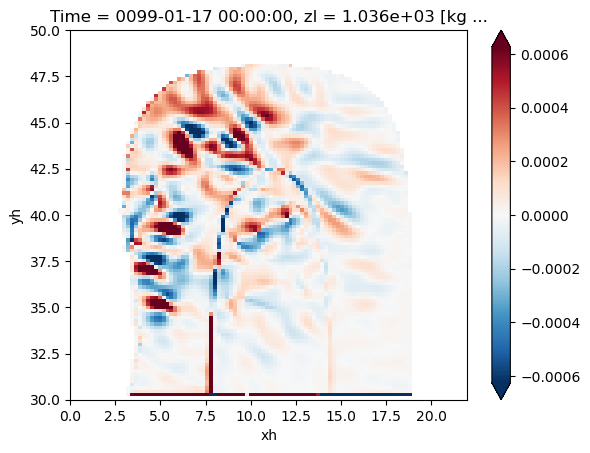

In [34]:
vec_Nhat.isel(Time=0, zl=1, Xn=0, Yn=0).plot(robust=True)